In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
import pandas as pd
from scipy.io import wavfile
import scipy.io.wavfile as waves
import scipy.fftpack as fourier

In [2]:
input_dir = "./pistas"
pista_n = "/nivel-"
punto = ".wav"
pista = "/nivel-1.1.wav"

In [3]:
file = input_dir + pista
IPython.display.Audio(file)

In [4]:
fs, Audiodata = wavfile.read(input_dir + pista)
print(f'Duracion = {Audiodata.shape[0]/fs} , Frecuencia de Muestreo = {fs} [=] Muestras/Seg' \
      f', Wav format = {Audiodata.dtype}')

Duracion = 1.8285714285714285 , Frecuencia de Muestreo = 44100 [=] Muestras/Seg, Wav format = int16


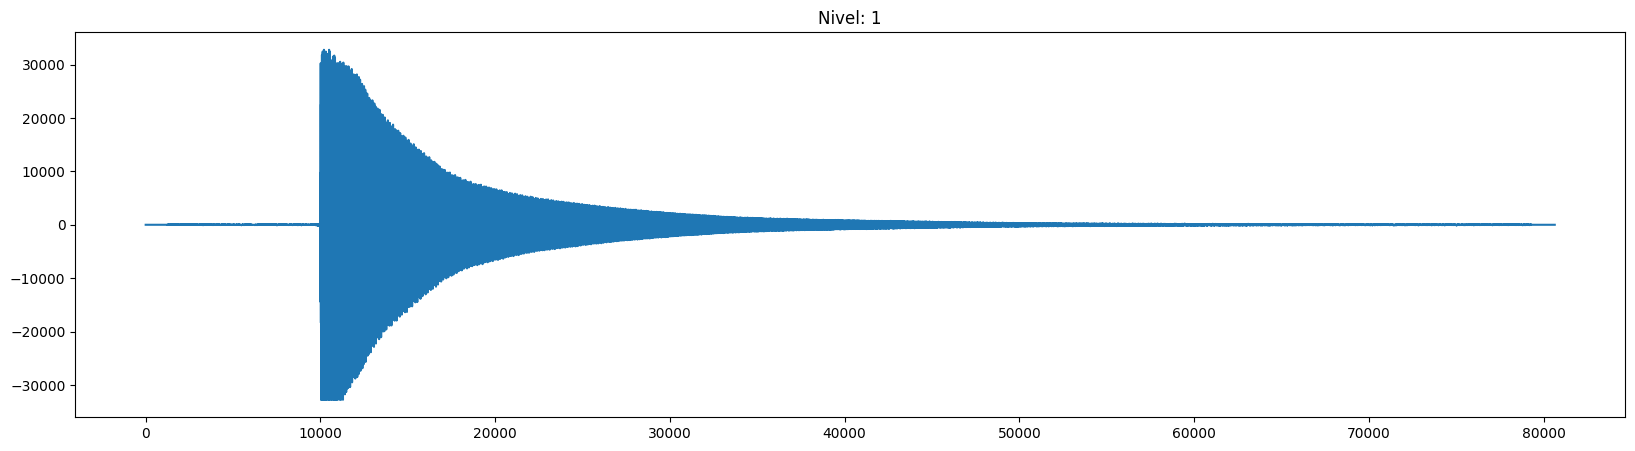

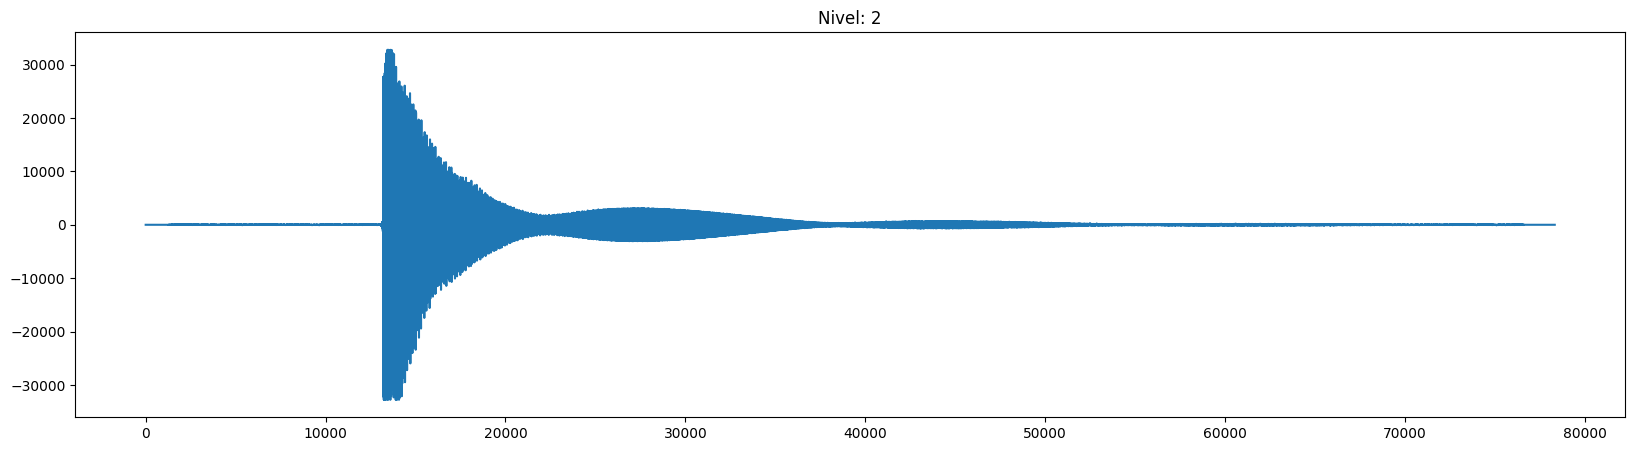

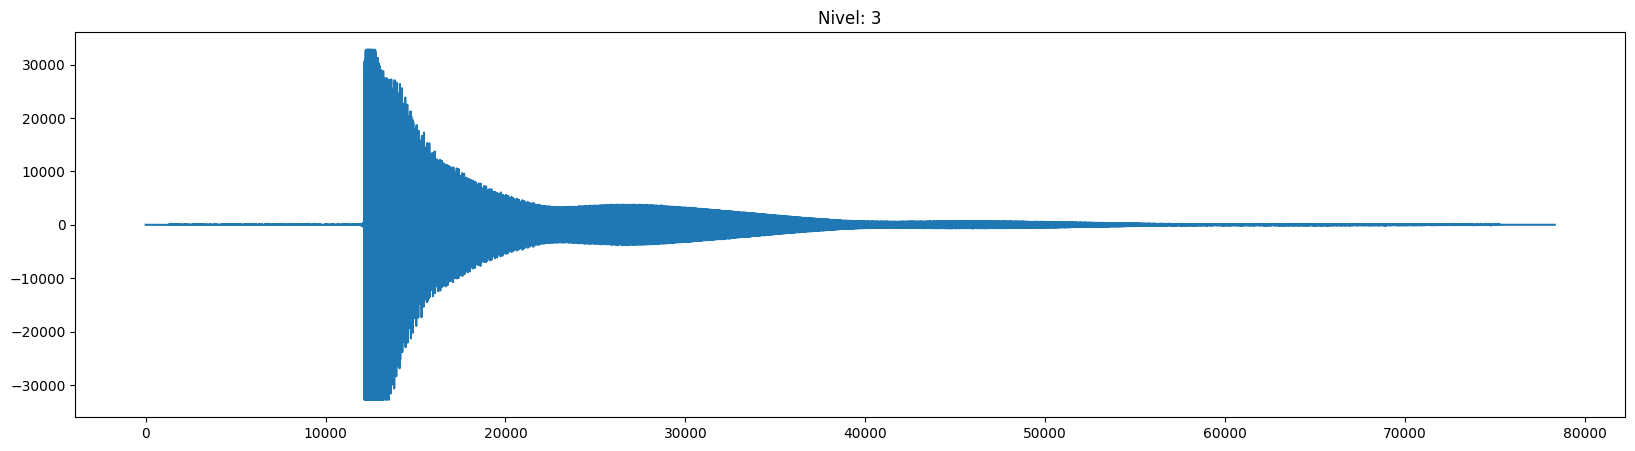

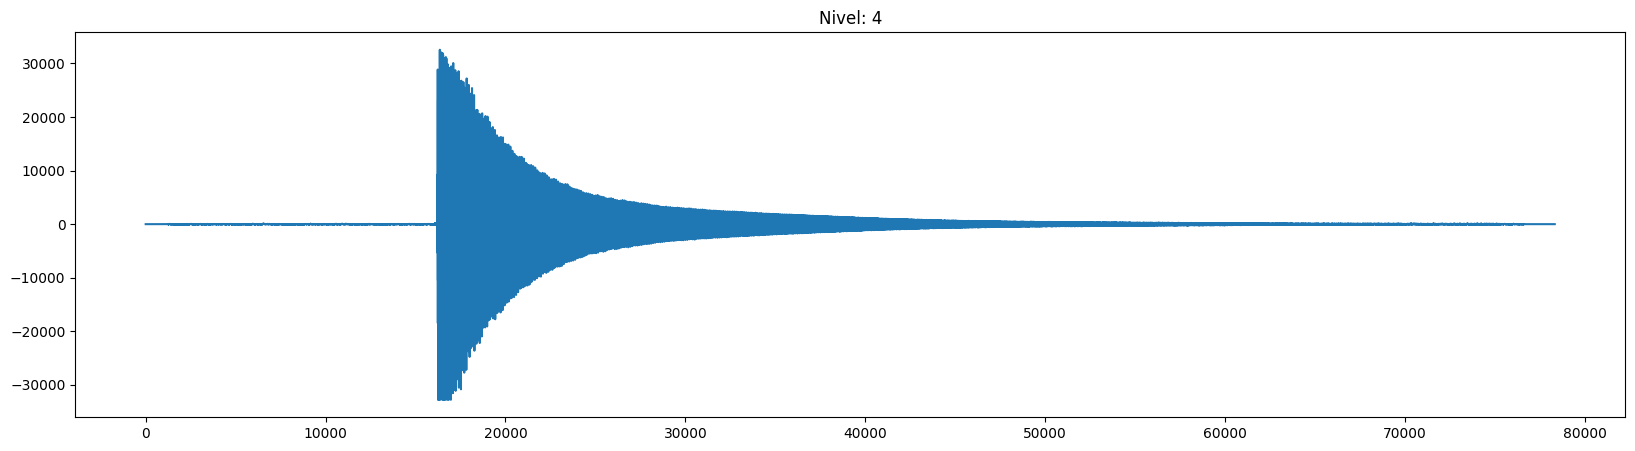

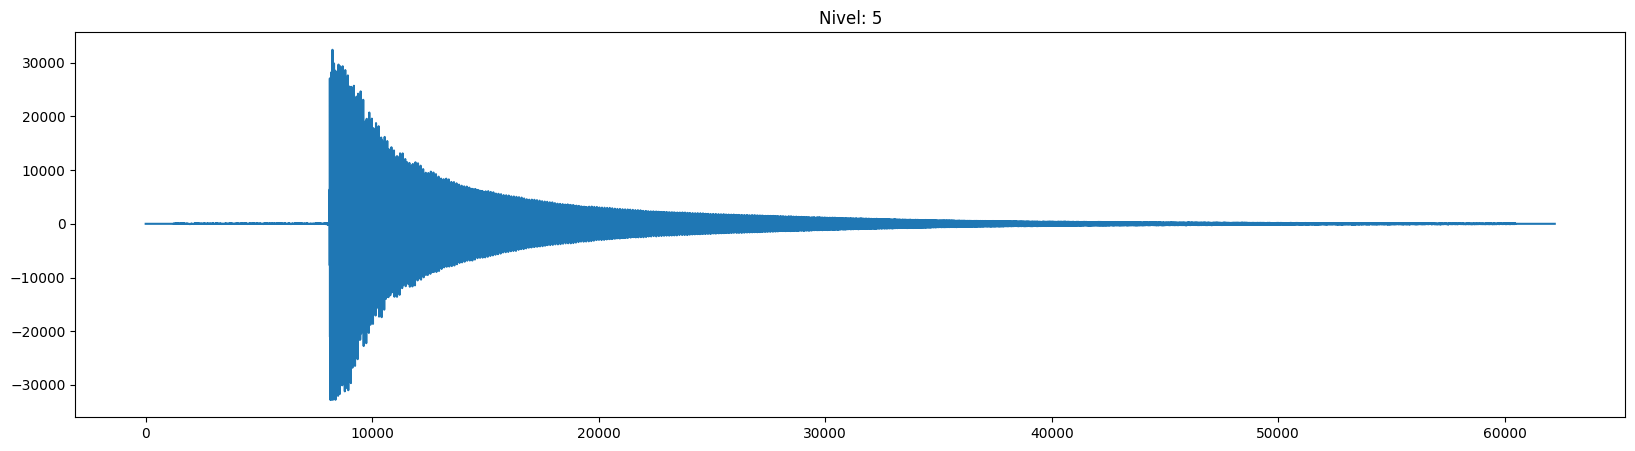

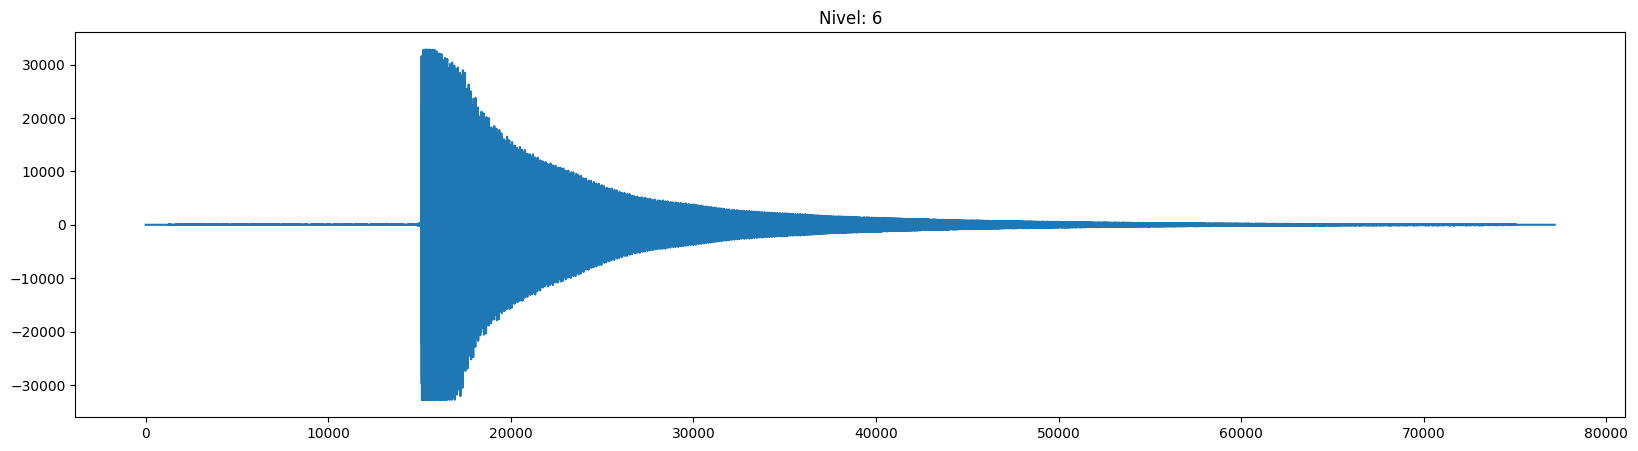

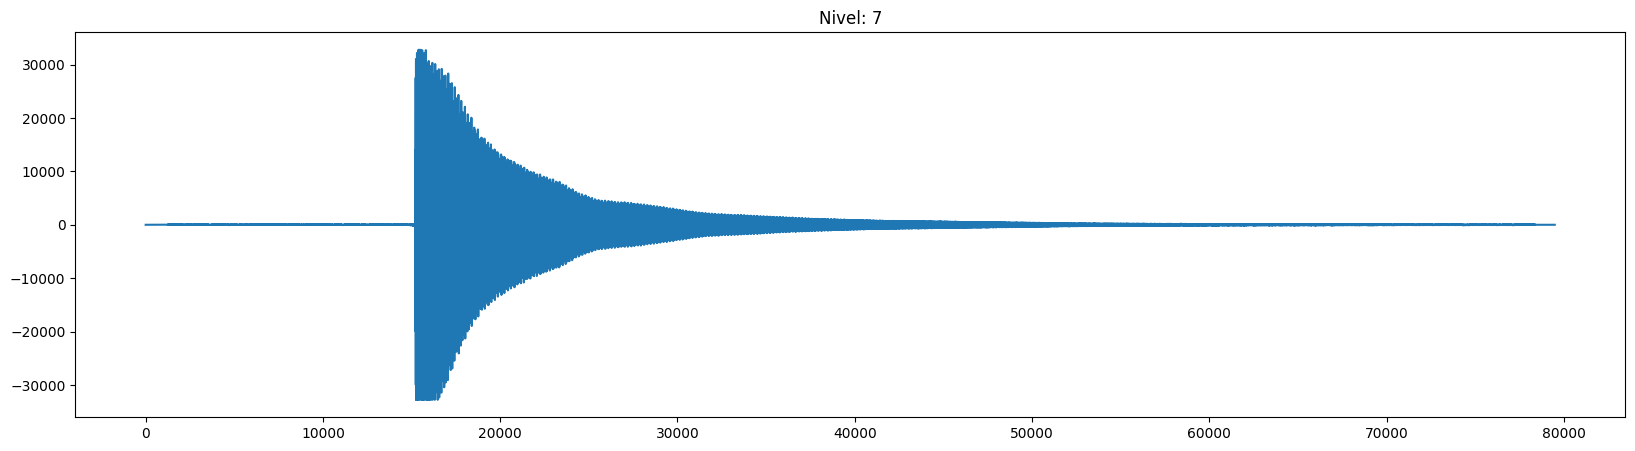

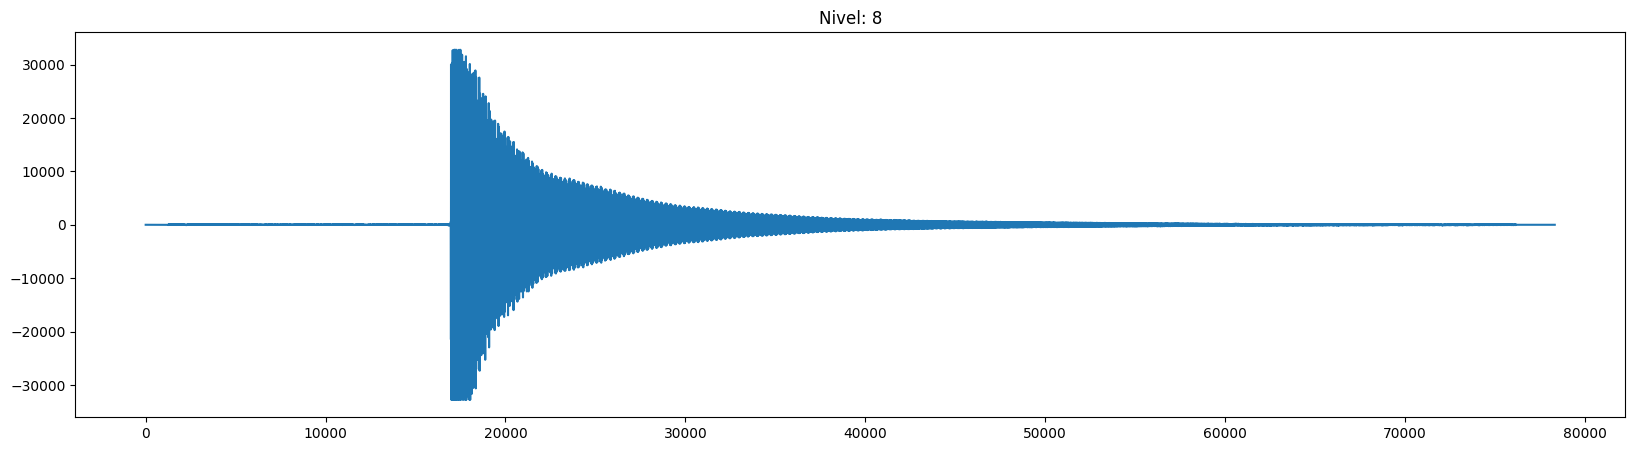

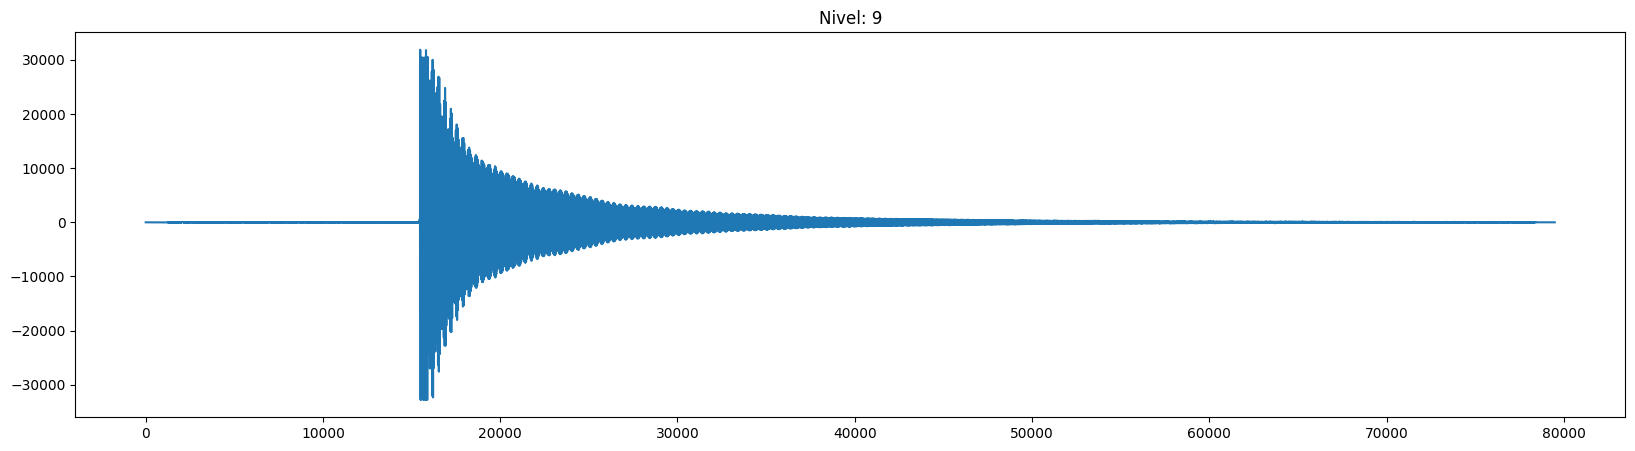

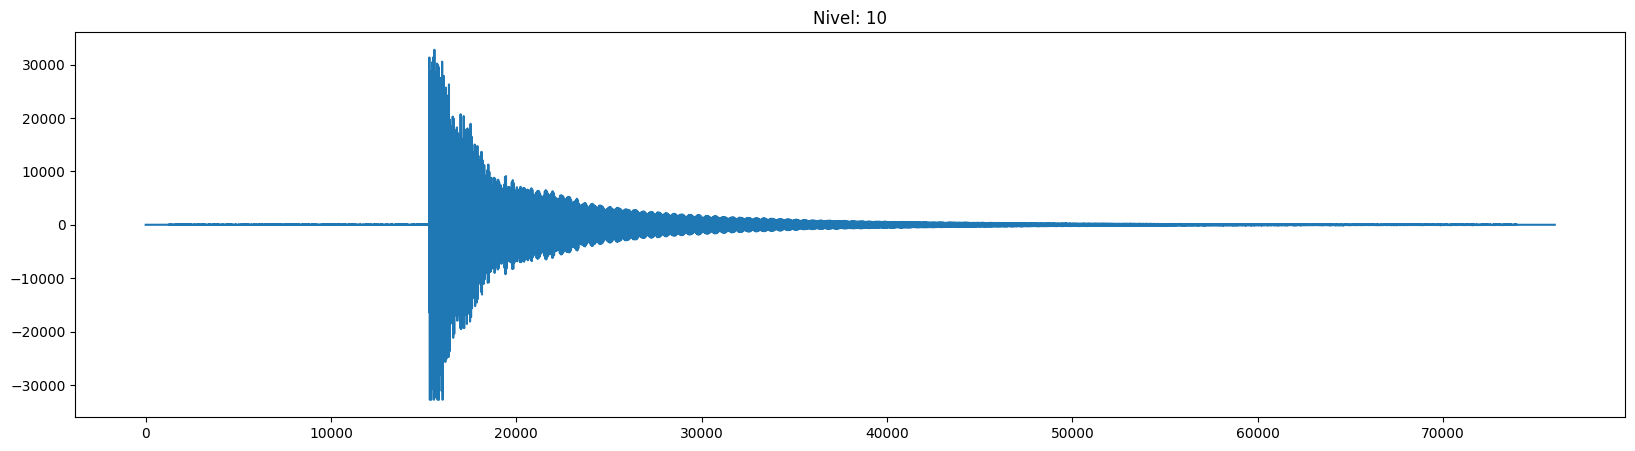

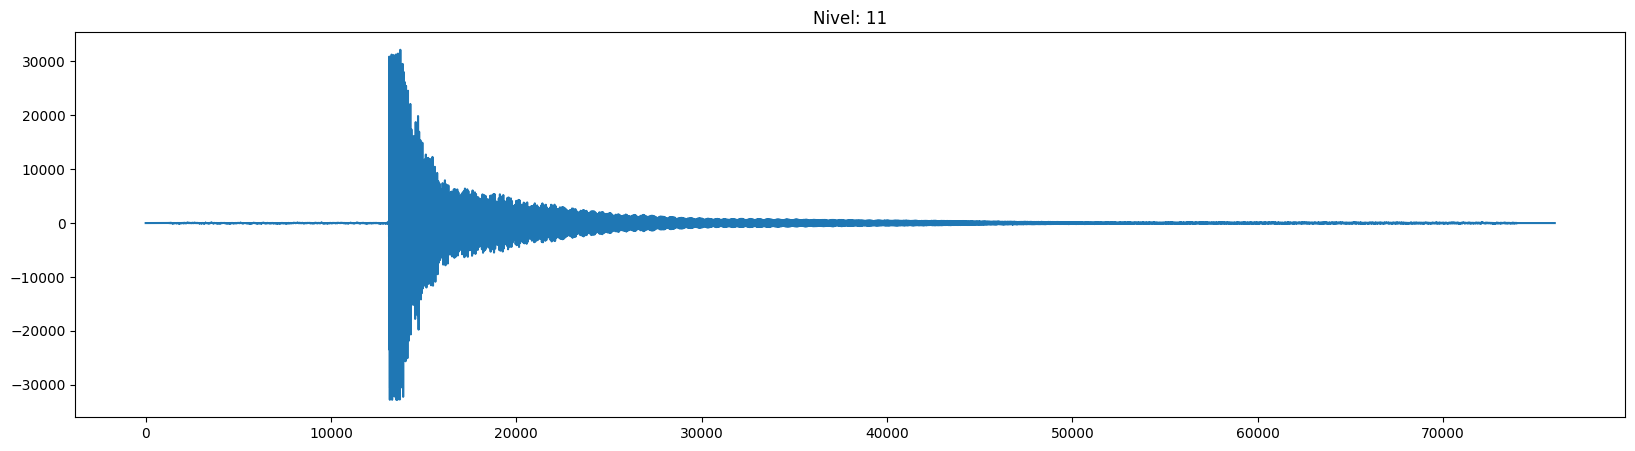

In [5]:
nivel = 1
for i in range(11):
    filename= input_dir + pista_n + str(nivel) + "." + "1" + punto
    Fs, data = waves.read(filename)                 
    Audio_m = data[:,0]              
    L = len(Audio_m)                                
    n = np.arange(0,L)/Fs
    plt.figure(figsize=(20,5))
    plt.title(f"Nivel: {nivel}")
    plt.plot(Audio_m)
    plt.show()
    nivel +=1

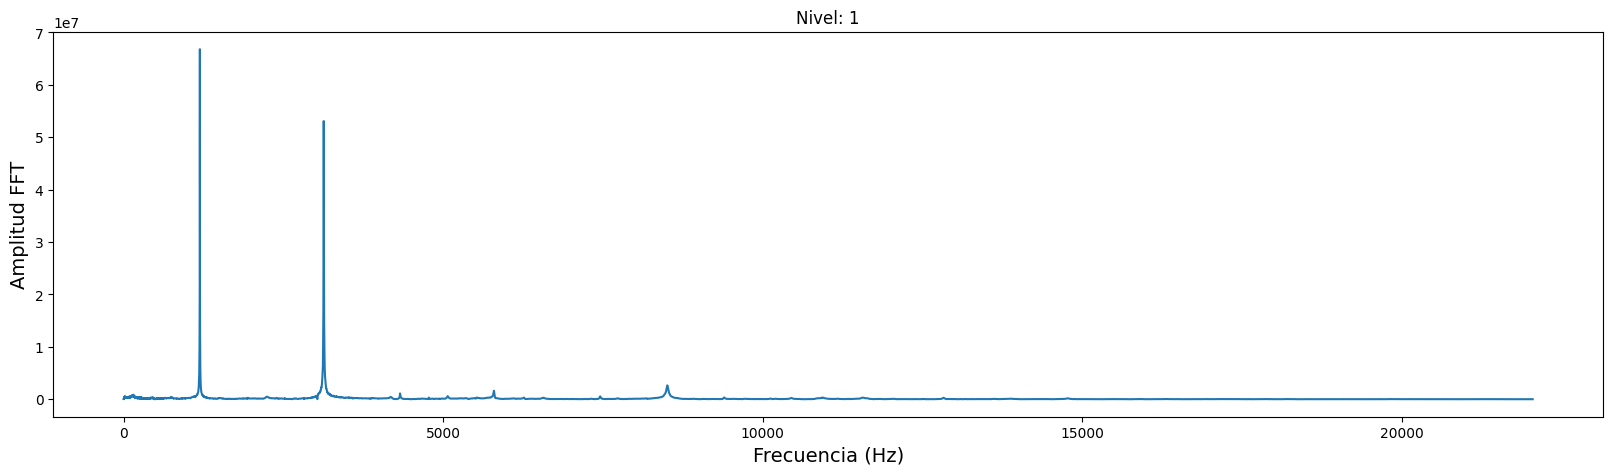

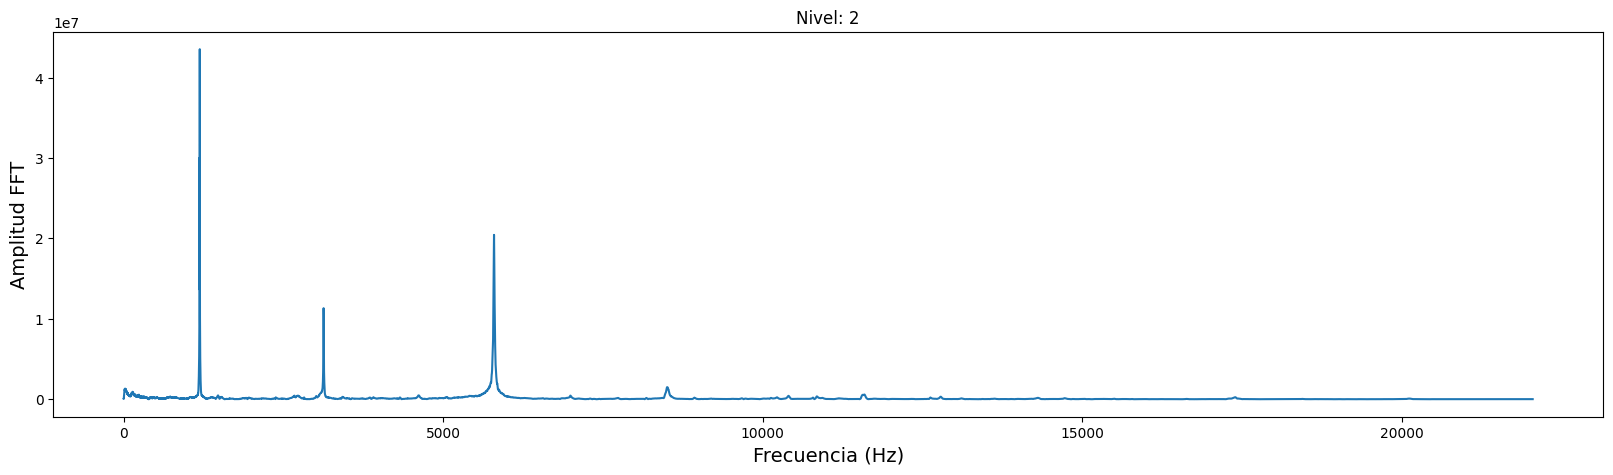

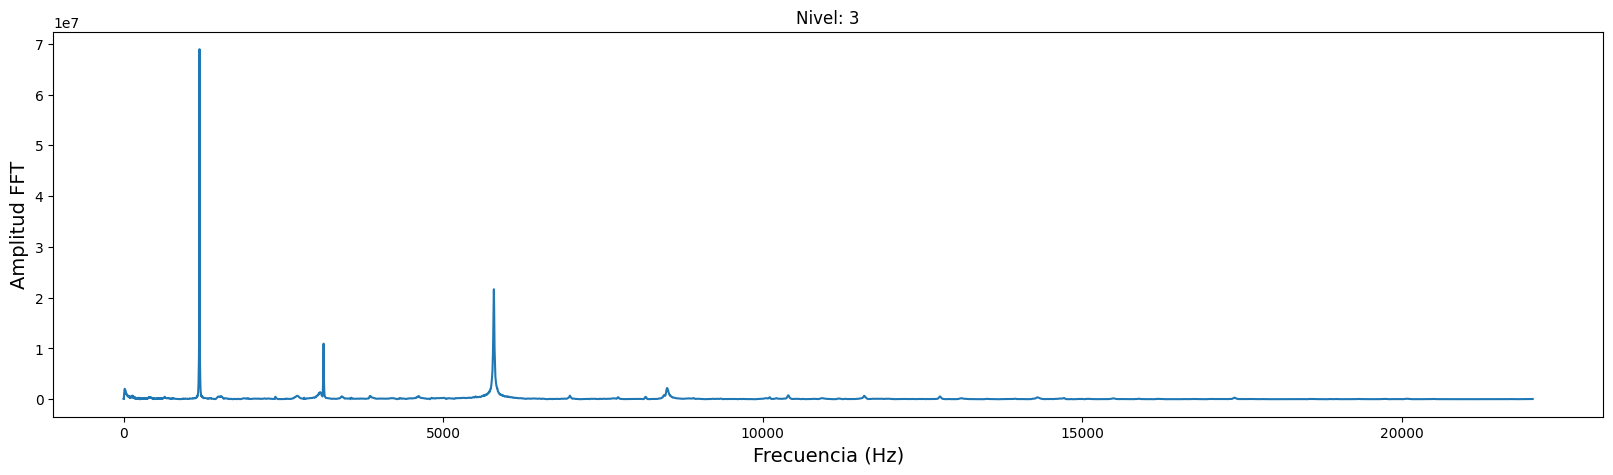

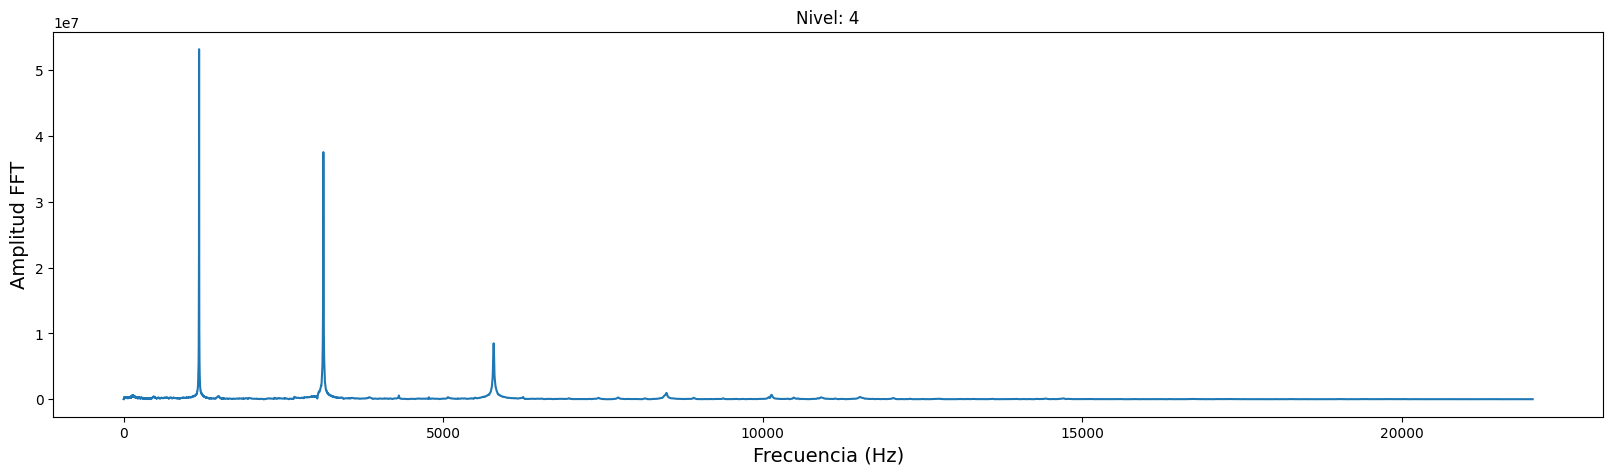

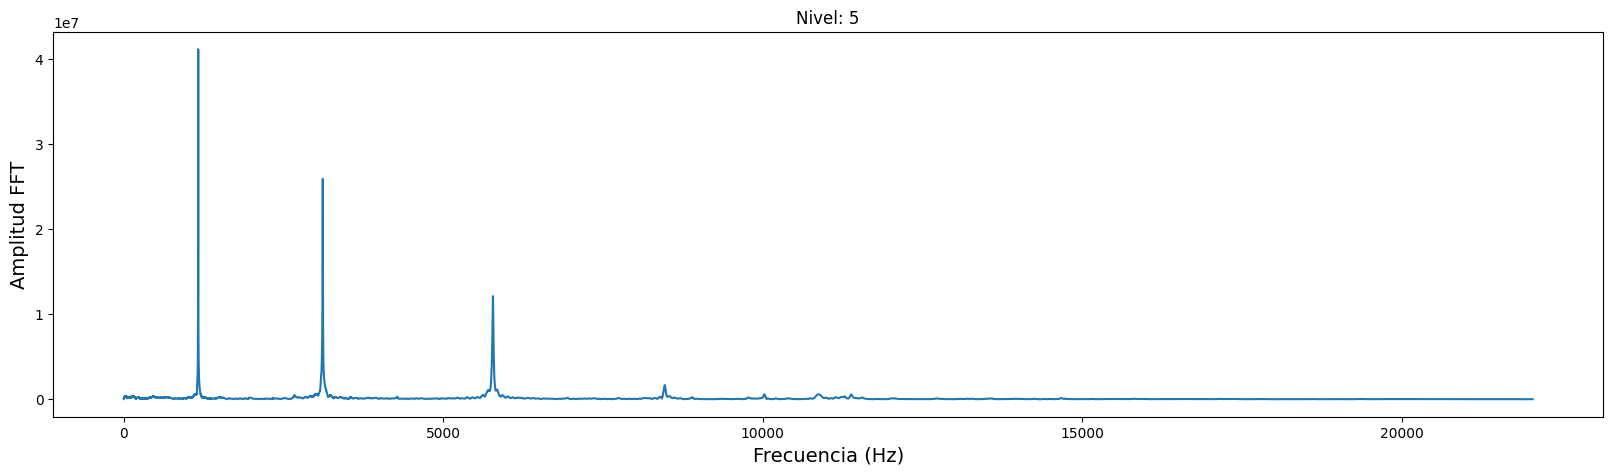

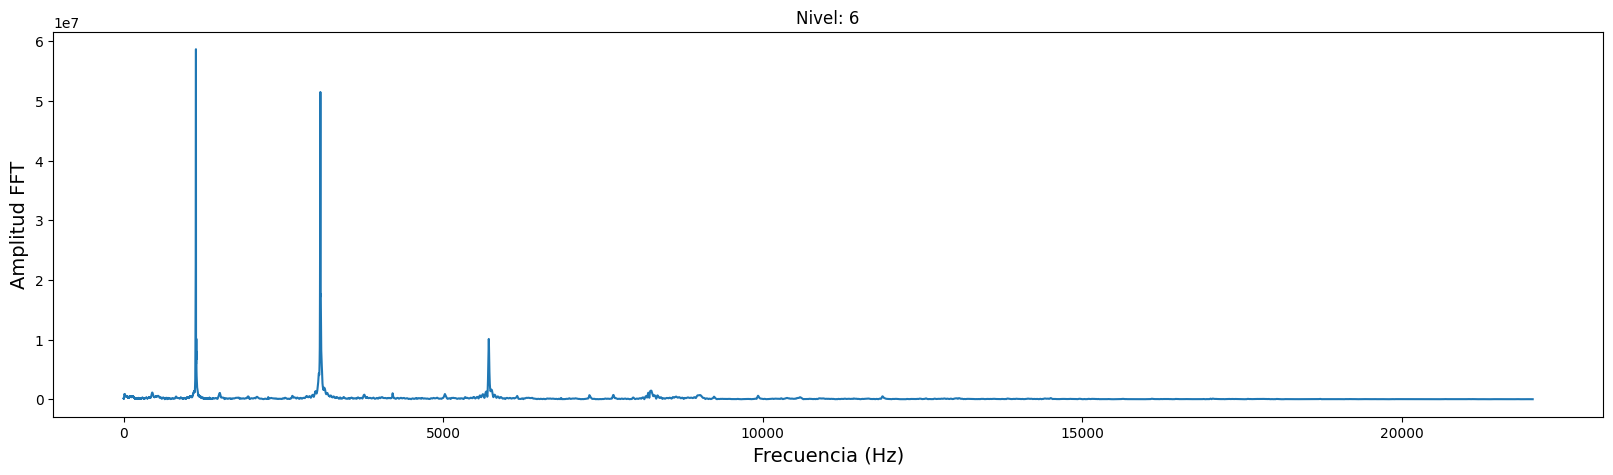

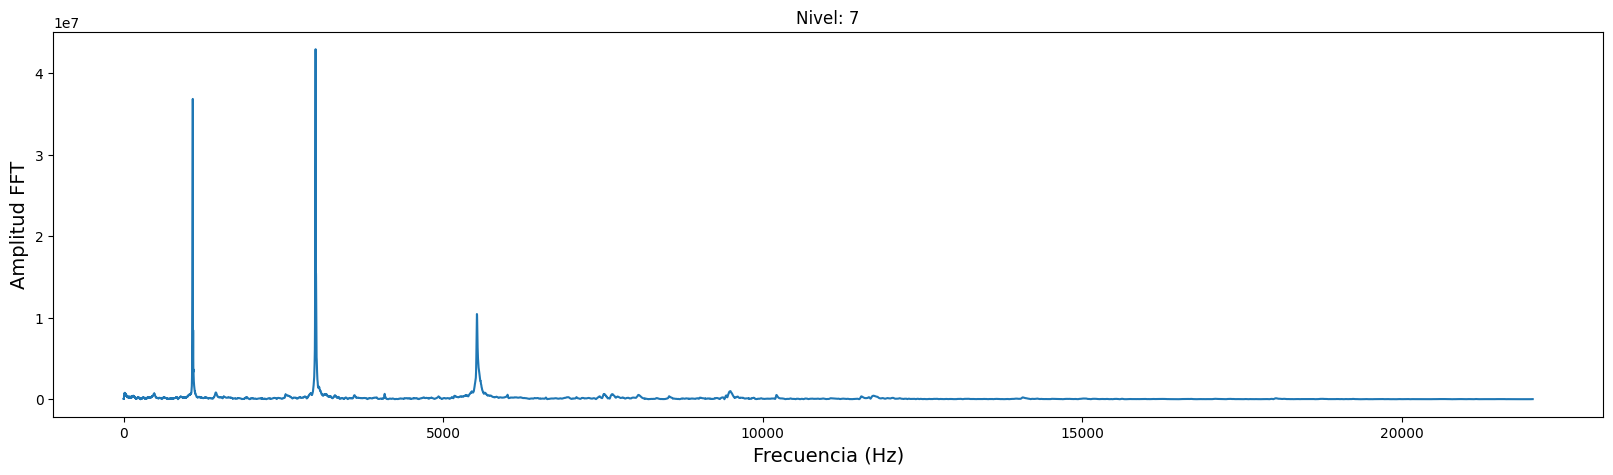

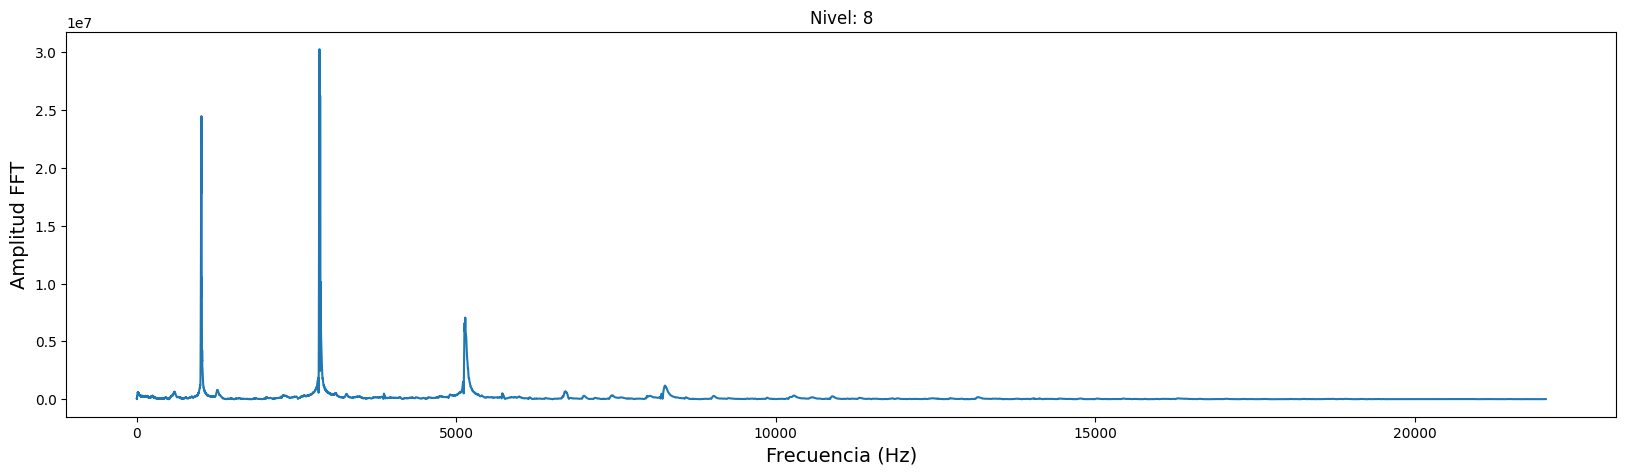

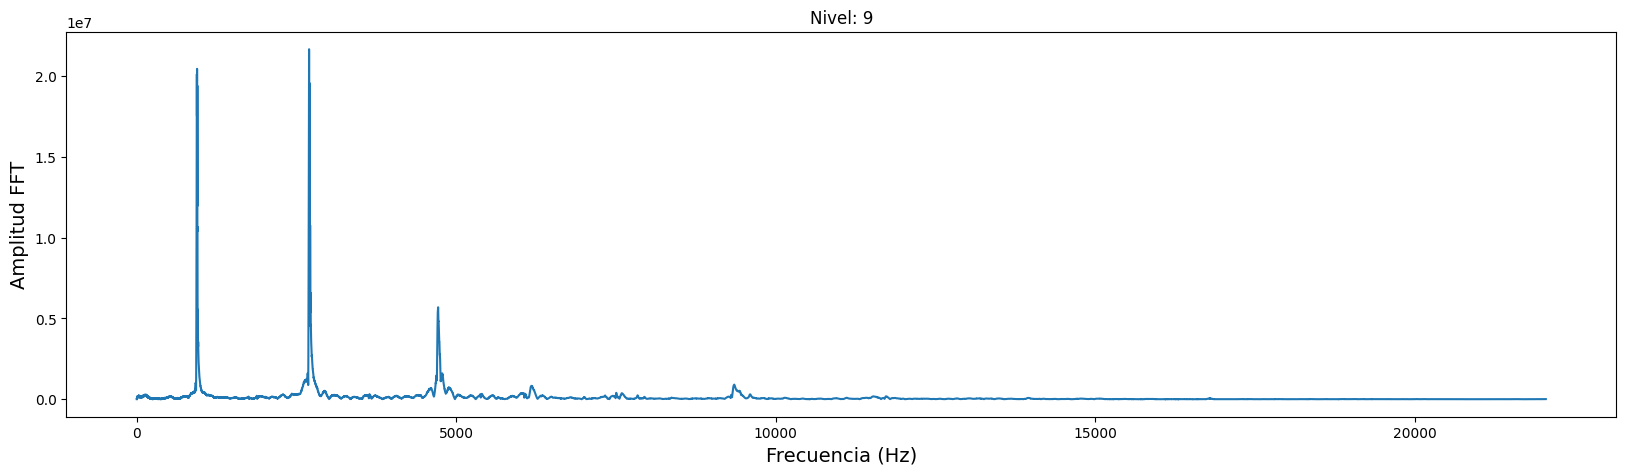

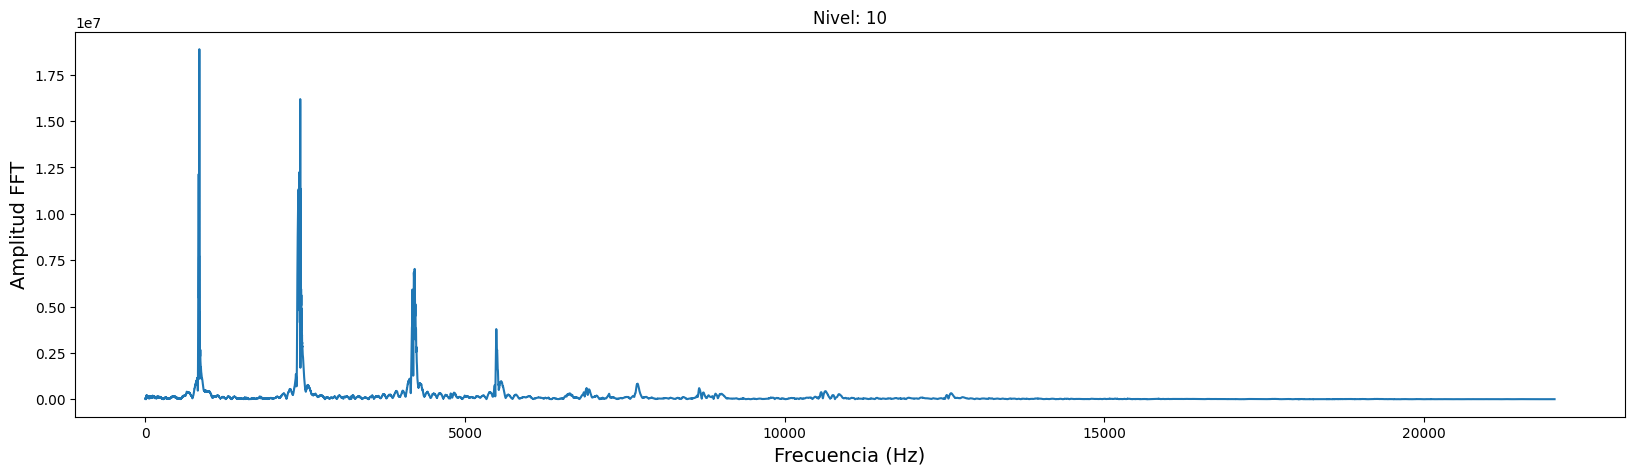

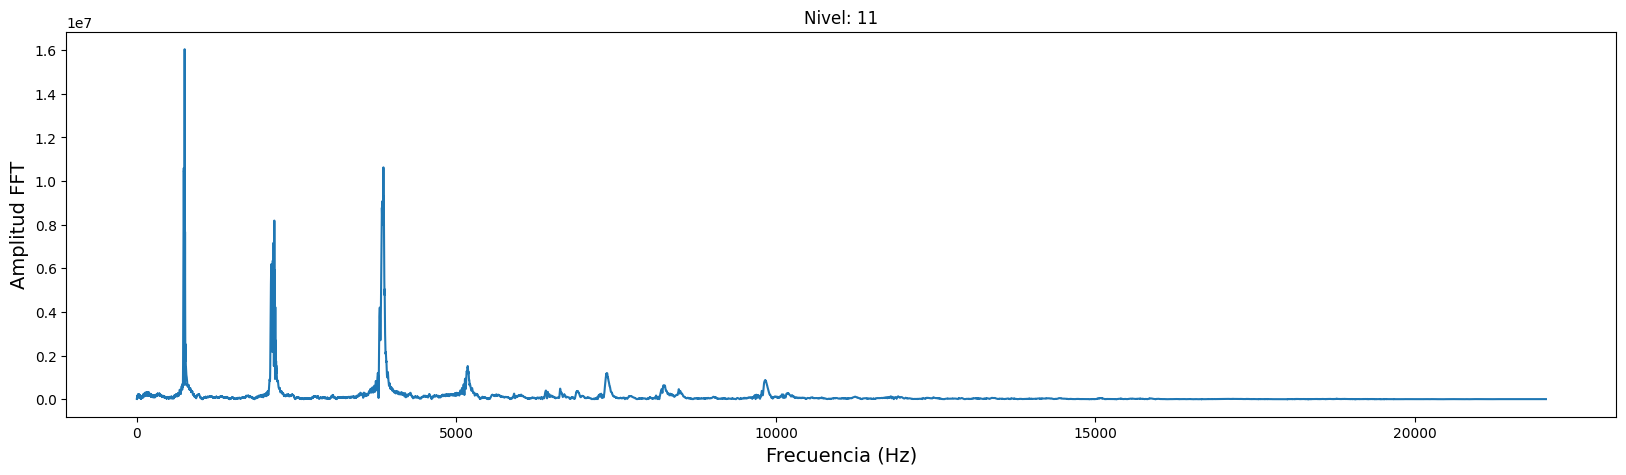

In [6]:
nivel = 1
for i in range(11):
    filename= input_dir + pista_n + str(nivel) + "." + "1" + punto
    Fs, data = waves.read(filename)                 
    Audio_m = data[:,0]              
    L = len(Audio_m)                                
    n = np.arange(0,L)/Fs
    fft = fourier.fft(Audio_m)
    fft_f = abs(fft)
    fft_f = fft_f[0:L//2]
    Ph_gk = np.angle(fft)
    F = Fs*np.arange(0, L//2)/L
    plt.figure(figsize=(20,5))
    plt.title(f"Nivel: {nivel}")
    plt.plot(F, fft_f)
    plt.xlabel('Frecuencia (Hz)', fontsize='14')
    plt.ylabel('Amplitud FFT', fontsize='14')
    plt.show()
    nivel +=1

In [7]:
nivel_ = 1
nivel = 1
frecuencias = []
for i in range(11):
    for j in range(4):
        filename= input_dir + pista_n + str(nivel) + "." + str(nivel_) + punto
        Fs, data = waves.read(filename)
        Audio_m = data[:,0]
        L = len(Audio_m)
        n = np.arange(0,L)/Fs
        fft = fourier.fft(Audio_m)
        fft_f = abs(fft)
        fft_f = fft_f[0:L//2]
        Ph_gk = np.angle(fft)
        F = Fs*np.arange(0, L//2)/L
        frec = np.where(fft_f == np.max(fft_f))
        datos_f = F[frec]
        frecuencias.append(float(datos_f))
        nivel_ += 1
    nivel_ = 1
    nivel += 1

C:\Users\migue\AppData\Local\Temp\ipykernel_3880\2152161416.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, data = waves.read(filename)


In [8]:
niveles = []
count_nivel = 1

for i in range(11):
    for j in range(4):
        niveles.append(count_nivel)
    count_nivel += 1

In [9]:
niveles

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11]

In [10]:
frecuencias

[1193.28125,
 3130.276639344262,
 1192.9159227289203,
 1192.8298697134862,
 1191.7853860294117,
 1191.09375,
 1191.7206602784204,
 1191.2769951706052,
 1187.844669117647,
 1188.4588068181818,
 1189.221373003958,
 1189.2677080212093,
 1181.0891544117646,
 1183.1298828125,
 1182.438408085913,
 1184.3252461271693,
 1167.578125,
 1167.0151654411766,
 1169.8425499708426,
 1167.653882898867,
 1131.8680037313434,
 1133.7139423076924,
 1138.126588126588,
 1140.477009365575,
 3004.2459239130435,
 3016.3194444444443,
 3003.9698616960814,
 1092.1908827096993,
 2859.8345588235293,
 1018.6705508474577,
 2850.849084994483,
 1027.4150402620444,
 2696.886322463768,
 2705.40771484375,
 931.6063661192973,
 945.4085722197124,
 842.767518939394,
 840.4206730769231,
 828.7059508785554,
 849.6342067679035,
 747.6444128787879,
 732.3061342592592,
 747.6395197923426,
 774.6239934488876]

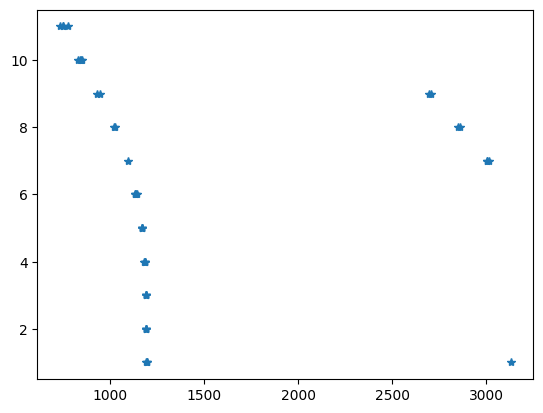

In [11]:
plt.figure()
plt.plot(frecuencias, niveles, '*')
plt.show()

Coeficientes: [[-0.0002183]], intercepto: [6.30609103]


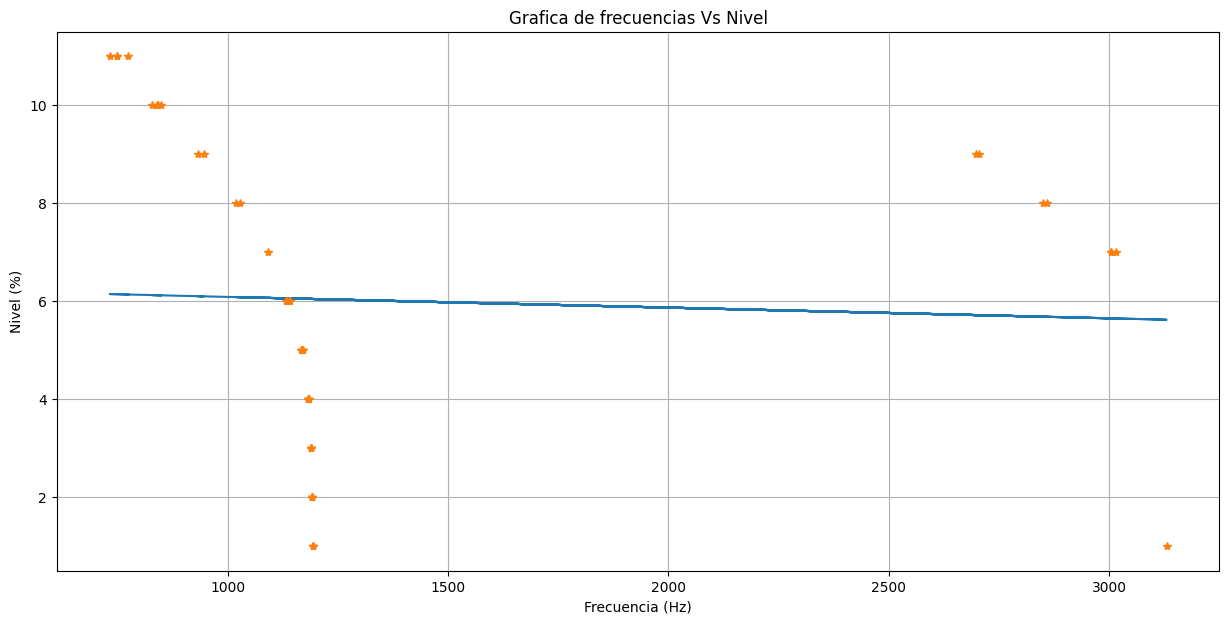

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

x = np.array(frecuencias)
y = np.array(niveles)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)

print(f"Coeficientes: {regr.coef_}, intercepto: {regr.intercept_}")

plt.figure(figsize=(15,7))
#plt.ylim(0,12)
plt.yticks()
#plt.xlim(700,1200)
plt.xticks()

plt.title("Grafica de frecuencias Vs Nivel")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Nivel (%)")
plt.plot(x, regr.coef_*x + regr.intercept_)
plt.plot(x, y, '*')
plt.grid()
plt.show()

In [13]:
y = np.delete(y, slice(0,16))

In [14]:
x = np.delete(x, slice(0, 16))

In [15]:
df = pd.DataFrame((y, x), index=['Niveles', 'Frecuencias'])

In [16]:
df.T

,Niveles,Frecuencias
0,5.0,1167.578125
1,5.0,1167.015165
2,5.0,1169.842550
3,5.0,1167.653883
4,6.0,1131.868004
5,6.0,1133.713942
6,6.0,1138.126588
7,6.0,1140.477009
8,7.0,3004.245924
9,7.0,3016.319444


In [17]:
x = np.delete(x, (8,9,10,12,14,16,17))
y = np.delete(y, (8,9,10,12,14,16,17))

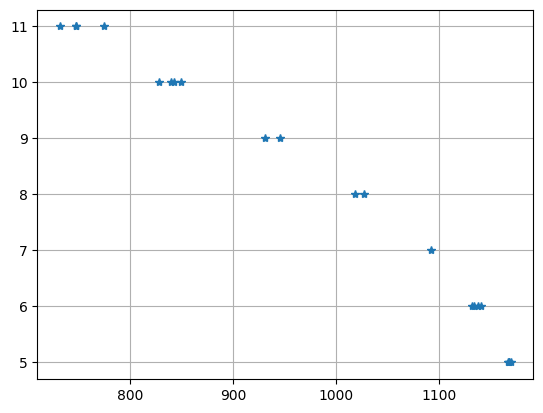

In [21]:
plt.figure()
plt.plot(x, y, '*')
plt.grid()
plt.show()

Coefficients: 
 [[-0.0138045]]
Mean squared error: 0.13
Coefficient of determination: 0.98
Coeficientes: [[-0.0138045]], intercepto: [21.58609213]


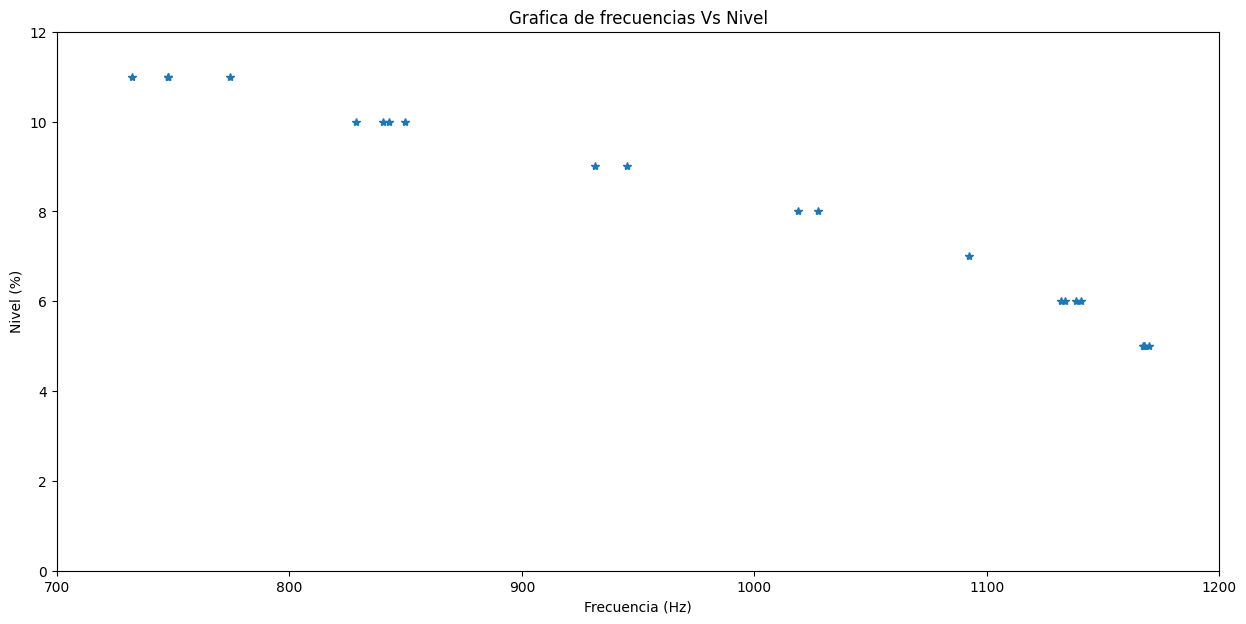

In [22]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)
regr = linear_model.LinearRegression()
regr.fit(x, y)

data_pred = regr.predict(x_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, data_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, data_pred))

print(f"Coeficientes: {regr.coef_}, intercepto: {regr.intercept_}")

plt.figure(figsize=(15,7))
plt.ylim(0,12)
plt.yticks()
plt.xlim(700,1200)
plt.xticks()
plt.title("Grafica de frecuencias Vs Nivel")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Nivel (%)")
plt.plot(x, y, '*')
#plt.grid()
plt.show()

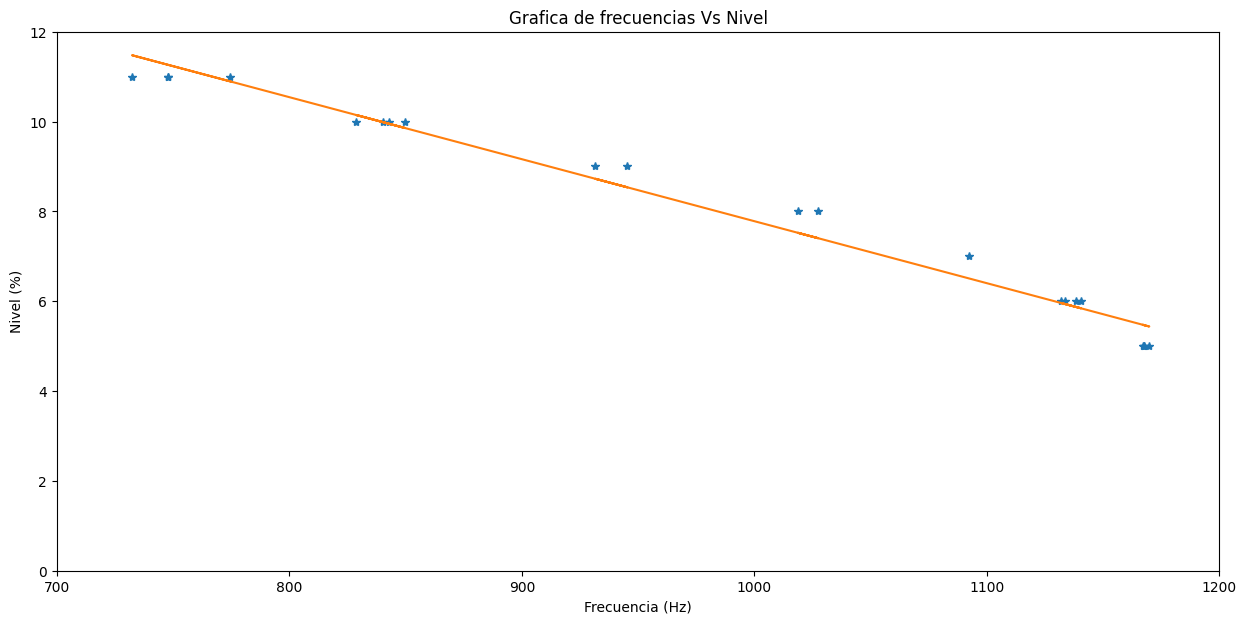

In [23]:
plt.figure(figsize=(15,7))
plt.ylim(0,12)
plt.yticks()
plt.xlim(700,1200)
plt.xticks()
#plt.scatter(x_test, y_test, color='r')
plt.plot(x, y, '*')
#plt.grid()
plt.title("Grafica de frecuencias Vs Nivel")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Nivel (%)")
yi = np.array(regr.coef_*x + regr.intercept_)
plt.plot(x, yi)
plt.show()

TEST

In [24]:
input_dir = "./test"
pista_n = "/test"
punto = ".wav"

frecuencia_test = []
g = 1
for i in range(10):
    filename= input_dir + pista_n + str(g) + punto
    Fs, data = waves.read(filename)                 
    Audio_m = data[:,0]              
    L = len(Audio_m)                                
    n = np.arange(0,L)/Fs
    sff = fourier.fft(Audio_m)                        
    sff_f = abs(sff)                                   
    sff_f = sff_f[0:L//2]                              
    Ph_gk = np.angle(sff)
    F = Fs*np.arange(0, L//2)/L
    es= np.where(sff_f == np.max(sff_f))
    si_es = F[es]
    frecuencia_test.append(si_es)
    g +=1

print(frecuencia_test)

[array([1193.28125]), array([840.42067308]), array([3016.31944444]), array([747.64441288]), array([1167.6538829]), array([1183.12988281]), array([2850.84908499]), array([1138.12658813]), array([2705.40771484]), array([1169.84254997])]


C:\Users\migue\AppData\Local\Temp\ipykernel_3880\2979674433.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, data = waves.read(filename)


In [27]:
es_o_no = regr.predict(frecuencia_test[0].reshape(-1, 1))
print(int(es_o_no))

5
